<a href="https://colab.research.google.com/github/allopeap/TrabajoDistribuidos/blob/main/practica8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 8. Visión por computador II

En esta práctica vamos a crear un clasificador capaz de reconocer dígitos manuscritos, para ello utilizaremos el dataset [MNIST](http://yann.lecun.com/exdb/mnist/) que ya hemos utilizado en prácticas anteriores.

Recordad los 5 pasos de un clasificador de imágenes:
1. Preparar el dataset.
2. Separar en conjuntos de entrenamiento, test y validación.
3. Extraer descriptores.
4. Entrenar el modelo.
5. Evaluar el modelo.

En muchas ocasiones los pasos 2 y 3 son intercambiables, y es lo que haremos en esta práctica.

## 0. Carga del dataset y descripción de las imágenes

Para cargar el dataset y describir las imágenes vamos a utilizar las clases `CargaYDescribe` (definida en el fichero CargaYDescribe.py de la carpeta p10) y la clase `Descriptor` junto con sus hijas (definidas en el fichero Descriptor.py también dentro de la carpeta p10). Deberás descargar esta carpeta y descomprimirla utilizando el siguiente comando.



In [8]:
!wget www.unirioja.es/cu/joheras/ia/p10/p10.zip -O p10.zip
!unzip p10.zip

--2024-04-25 21:45:55--  http://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.146.238.61
Connecting to www.unirioja.es (www.unirioja.es)|193.146.238.61|:80... connected.
HTTP request sent, awaiting response... 302 Object moved
Location: https://www.unirioja.es:443/cu/joheras/ia/p10/p10.zip [following]
--2024-04-25 21:45:56--  https://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Connecting to www.unirioja.es (www.unirioja.es)|193.146.238.61|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /cu/joheras/ia/p10/p10.zip [following]
--2024-04-25 21:45:56--  https://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Reusing existing connection to www.unirioja.es:443.
HTTP request sent, awaiting response... 200 No headers, assuming HTTP/0.9
Length: unspecified
Saving to: ‘p10.zip’

p10.zip                 [           <=>      ]   1.60K  --.-KB/s    in 9.6s    

2024-04-25 21:46:07 (170 B/s) - ‘p10.zip’ saved [1636]

Archive:  p10.

Si abres el fichero Descriptor.py (puedes abrir dicho fichero pulsando en la pestaña con el símbolo ">" que aparece a la izquierda de la pantalla y luego pulsando en la pestaña Files), verás la definición de la clase `Descriptor` y de dos clases hijas. La principal característica de la clase `Descriptor` es que tiene un método llamado `describe` que sirve para describir una imagen. Este método es abstracto y lo proporcionan las clases hijas.

##### Pregunta

¿Qué hacen los métodos ``describe`` de las clases RawImage y Projection?

**Respuesta**

Este método toma una imagen como entrada y si la imagen tiene tres canales de color (lo que significa que es una imagen en color), la convierte a escala de grises utilizando. Luego, utiliza flatten() para aplanar la imagen en un solo vector y lo devuelve. En el Projection el proceso es bastante similar pero calcula la proyección de la imagen sumando los valores de píxeles a lo largo de las filas y columnas de la imagen. Lo que nos deja una lista de sumas de píxeles de todas las filas seguidas de las sumas de píxeles de todas las columnas.

Si ahora abres el fichero CargaYDescribe.py verás la definición de la clase `CargaYDescribe`. Esta clase permite cargar y describir las imágenes de un directorio que está organizado mediante carpetas donde cada carpeta contiene
las imágenes de una clase.

El constructor de esta clase recibe dos parámetros, un objeto de la clase `Descriptor`, lo que nos permite cambiar fácilmente el método que usamos para describir las imágenes (esta es una técnica llamada inyección de dependencias que ya hemos utilizado alguna vez), y un path que es donde se encuentran las carpetas con las imágenes de cada clase.

Definimos una variable donde almacenamos el path donde se encuentran nuestra imágenes. De nuevo, es necesario descargar la carpeta.

In [7]:
%%capture
!wget www.unirioja.es/cu/joheras/ia/p10/digitos.zip
!unzip digitos.zip

In [5]:
dataset = "digitos/"

Para este ejemplo vamos a utilizar como descriptor el RawImage.

In [9]:
from p10.Descriptor import *
from p10.CargaYDescribe import *

descriptor = RawImage()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

##### Ejercicio

Comprueba que puedes cambiar de descriptor y que todo sigue funcionando correctamente.


In [10]:
descriptor = Projection()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

## 1. Separando el conjunto de entrenamiento y el de test

##### Ejercicio

Utiliza la función train_test_split, vista en las prácticas de aprendizaje automático, para partir el dataset en la siguiente proporción: 75% entrenamiento, 25% test. Almacena la partición en las variables:
`trainData`, `testData`, `trainLabels`, `testLabels`. Utiliza como random_state el valor 84 para así obtener siempre los mismos resultados.

In [11]:
from sklearn.model_selection import train_test_split

(trainData, testData, trainLabels, testLabels) = train_test_split(datos,etiquetas,test_size=0.25, random_state=42)

## 2. Entrenando el modelo

Una vez que hemos partido el banco de imágenes, podemos entrenar distintos modelos como vimos en prácticas anteriores.

**Ejercicio**

Utiliza KNN y aplica validación cruzada para fijar los hiperparámetros.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for k in range(1,100,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.78 (+/- 0.05)
k=3, Precisión: 0.77 (+/- 0.03)
k=5, Precisión: 0.78 (+/- 0.04)
k=7, Precisión: 0.78 (+/- 0.05)
k=9, Precisión: 0.77 (+/- 0.06)
k=11, Precisión: 0.77 (+/- 0.06)
k=13, Precisión: 0.76 (+/- 0.07)
k=15, Precisión: 0.75 (+/- 0.05)
k=17, Precisión: 0.74 (+/- 0.07)
k=19, Precisión: 0.74 (+/- 0.06)
k=21, Precisión: 0.73 (+/- 0.07)
k=23, Precisión: 0.73 (+/- 0.07)
k=25, Precisión: 0.73 (+/- 0.07)
k=27, Precisión: 0.72 (+/- 0.08)
k=29, Precisión: 0.72 (+/- 0.07)
k=31, Precisión: 0.72 (+/- 0.07)
k=33, Precisión: 0.72 (+/- 0.07)
k=35, Precisión: 0.71 (+/- 0.08)
k=37, Precisión: 0.71 (+/- 0.08)
k=39, Precisión: 0.71 (+/- 0.08)
k=41, Precisión: 0.71 (+/- 0.07)
k=43, Precisión: 0.70 (+/- 0.07)
k=45, Precisión: 0.70 (+/- 0.07)
k=47, Precisión: 0.70 (+/- 0.07)
k=49, Precisión: 0.70 (+/- 0.07)
k=51, Precisión: 0.69 (+/- 0.07)
k=53, Precisión: 0.69 (+/- 0.07)
k=55, Precisión: 0.69 (+/- 0.07)
k=57, Precisión: 0.69 (+/- 0.06)
k=59, Precisión: 0.69 (+/- 0.07)
k=61, Precisión

**Ejercicio**

Una vez hayas encontrado los mejores hiperparámetros almacena y entrena el modelo.

In [23]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=3)

##### Ejercicio

Utiliza otro de los algoritmos de clasificación vistos en las prácticas anteriores para crear un nuevo modelo.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for k in range(1, 25, 2):
    modelDT = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(modelDT, trainData, trainLabels, cv=10)
    print("max_depth=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))


max_depth=1, Precisión: 0.20 (+/- 0.01)
max_depth=3, Precisión: 0.43 (+/- 0.05)
max_depth=5, Precisión: 0.57 (+/- 0.06)
max_depth=7, Precisión: 0.66 (+/- 0.08)
max_depth=9, Precisión: 0.70 (+/- 0.07)
max_depth=11, Precisión: 0.70 (+/- 0.07)
max_depth=13, Precisión: 0.71 (+/- 0.07)
max_depth=15, Precisión: 0.70 (+/- 0.07)
max_depth=17, Precisión: 0.70 (+/- 0.08)
max_depth=19, Precisión: 0.70 (+/- 0.06)
max_depth=21, Precisión: 0.70 (+/- 0.07)
max_depth=23, Precisión: 0.71 (+/- 0.07)


In [11]:
from sklearn.tree import DecisionTreeClassifier

modelArbol  = DecisionTreeClassifier(max_depth=13)
modelArbol.fit(trainData, trainLabels)


DecisionTreeClassifier(max_depth=13)

## 3. Evaluando el modelo

##### Ejercicio
Una vez tienes tu modelo construido evalualo utilizando la función `classification_report` de la librería sklearn.

In [12]:
from sklearn.metrics import classification_report

predictions = modelKNN.predict(testData)
report = classification_report(testLabels, predictions)

print(report)


              precision    recall  f1-score   support

           0       0.73      0.94      0.82        71
           1       0.58      1.00      0.73        62
           2       0.78      0.75      0.77        76
           3       0.71      0.62      0.66        63
           4       0.80      0.69      0.75        59
           5       0.85      0.46      0.59        72
           6       0.90      0.88      0.89        60
           7       0.91      0.78      0.84        55
           8       0.89      0.78      0.83        60
           9       0.77      0.79      0.78        62

    accuracy                           0.77       640
   macro avg       0.79      0.77      0.77       640
weighted avg       0.79      0.77      0.76       640



In [13]:
from sklearn.metrics import classification_report

predictions = modelArbol.predict(testData)
report = classification_report(testLabels, predictions)

print(report)


              precision    recall  f1-score   support

           0       0.70      0.70      0.70        71
           1       0.77      0.85      0.81        62
           2       0.67      0.66      0.66        76
           3       0.48      0.48      0.48        63
           4       0.65      0.66      0.66        59
           5       0.54      0.51      0.53        72
           6       0.81      0.77      0.79        60
           7       0.77      0.67      0.72        55
           8       0.57      0.68      0.62        60
           9       0.74      0.68      0.71        62

    accuracy                           0.66       640
   macro avg       0.67      0.67      0.67       640
weighted avg       0.67      0.66      0.66       640



##### Ejercicio

A continuación muestra la matriz de confusión para ver dónde se producen los fallos.

In [14]:
print("MATRIZ DE CONFUSIÓN USANDO ARBOL")

from sklearn.metrics import confusion_matrix
print(confusion_matrix(testLabels, predictions))

MATRIZ DE CONFUSIÓN USANDO ARBOL
[[50  0  2  5  0  5  1  0  7  1]
 [ 1 53  1  1  1  0  1  1  3  0]
 [ 4  1 50  7  0  2  6  2  3  1]
 [ 3  1  8 30  0 12  0  2  6  1]
 [ 2  5  0  0 39  0  2  1  3  7]
 [ 4  1  8 12  1 37  1  2  6  0]
 [ 4  2  2  0  2  4 46  0  0  0]
 [ 0  2  1  2  5  2  0 37  2  4]
 [ 3  2  2  4  2  5  0  0 41  1]
 [ 0  2  1  2 10  1  0  3  1 42]]


##### Ejercicio

Con el modelo KNN somos capaces de conseguir una precisión del 92%, aunque no está mal, se puede mejorar. Intenta construir un modelo que mejore estos resultados, puedes probar también a cambiar de descriptor.

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LogisticRegression

def randomsearch(model,parameters,scores,k=5):
    for score in scores:
      print("# Tuning hyper-parameters for %s" % score)
      print()

      clf = RandomizedSearchCV(model, parameters,cv=k)
      clf.fit(trainData, trainLabels)

      print("Best parameters set found on development set:")
      print()
      print(clf.best_params_)
      print()

In [ ]:
modelLR = LogisticRegression(max_iter=1000)
randomsearch(modelLR, {'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2', 'none'],
                     'C': [0.01, 0.1,1, 10]},scores,5)

# Tuning hyper-parameters for 0.6979166666666666



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/pyth

Best parameters set found on development set:

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

# Tuning hyper-parameters for 0.6770833333333334



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters set found on development set:

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

# Tuning hyper-parameters for 0.6458333333333334



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: Conver

Best parameters set found on development set:

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.1}

# Tuning hyper-parameters for 0.7604166666666666



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters set found on development set:

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

# Tuning hyper-parameters for 0.7135416666666666



/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the n

Best parameters set found on development set:

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

# Tuning hyper-parameters for 0.7135416666666666



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [4]:
modelLR = LogisticRegression(solver='newton-cg', penalty='l2', C=0.01)

In [13]:
modelLR.fit(trainData, trainLabels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.01, solver='newton-cg')

In [14]:
from sklearn.metrics import classification_report

predictions = modelLR.predict(testData)
report = classification_report(testLabels, predictions)

print(report)


              precision    recall  f1-score   support

           0       0.92      0.89      0.90        62
           1       0.77      0.80      0.79        71
           2       0.69      0.70      0.69        60
           3       0.69      0.67      0.68        55
           4       0.78      0.85      0.81        59
           5       0.53      0.50      0.51        62
           6       0.81      0.89      0.85        63
           7       0.86      0.82      0.84        60
           8       0.64      0.62      0.63        72
           9       0.86      0.82      0.84        76

    accuracy                           0.76       640
   macro avg       0.75      0.76      0.75       640
weighted avg       0.76      0.76      0.76       640



## 4. Guardando y cargando el modelo

El proceso de entrenar un modelo puede ser muy costoso, por lo que conviene guardar el modelo para poder recuperarlo posteriormente. Para ello utilizamos la librería `pickle`.

In [15]:
import pickle

La siguiente instrucción guarda el modelo en el fichero modelo.sav.

In [24]:
pickle.dump(modelKNN, open('modelo.sav', 'wb'))

La siguiente instrucción carga el modelo del fichero modelo.sav.

In [25]:
loaded_model = pickle.load(open('modelo.sav', 'rb'))

Ahora podemos usar el modelo igual que antes.

In [26]:
predictions = loaded_model.predict(testData)
print(classification_report(testLabels, predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87        62
           1       0.62      0.92      0.74        71
           2       0.78      0.78      0.78        60
           3       0.62      0.64      0.63        55
           4       0.75      0.78      0.77        59
           5       0.82      0.50      0.62        62
           6       0.92      0.86      0.89        63
           7       0.95      0.87      0.90        60
           8       0.87      0.67      0.76        72
           9       0.82      0.78      0.80        76

    accuracy                           0.78       640
   macro avg       0.79      0.78      0.78       640
weighted avg       0.79      0.78      0.78       640



Para descargar el fichero desde Colab a nuestro ordenador, hay que ejecutar las siguientes instrucciones (esta funcionalidad solo está disponible usando como navegador Google Chrome).

In [27]:
from google.colab import files
files.download('modelo.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Ejercicio

Guarda tu mejor modelo en el fichero `mimodelo.sav`.

In [28]:
pickle.dump(modelLR, open('mimodelo.sav', 'wb'))
loaded_model = pickle.load(open('mimodelo.sav', 'rb'))
predictions = loaded_model.predict(testData)
print(classification_report(testLabels, predictions))
from google.colab import files
files.download('mimodelo.sav')

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        62
           1       0.77      0.80      0.79        71
           2       0.69      0.70      0.69        60
           3       0.69      0.67      0.68        55
           4       0.78      0.85      0.81        59
           5       0.53      0.50      0.51        62
           6       0.81      0.89      0.85        63
           7       0.86      0.82      0.84        60
           8       0.64      0.62      0.63        72
           9       0.86      0.82      0.84        76

    accuracy                           0.76       640
   macro avg       0.75      0.76      0.75       640
weighted avg       0.76      0.76      0.76       640



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###### Ejercicio

Realizar un estudio estadístico utilizando el paquete StatisticalAnalisis visto en la práctica 6. Será necesario que conviertas tanto los datos como las etiquetas a arrays de numpy.  


In [30]:
import numpy as np

datos_np = np.array(datos)
etiquetas_np = np.array(etiquetas)


In [35]:
!pip install StatisticalAnalysis


  Preparing metadata (setup.py) ... done
  Created wheel for StatisticalAnalysis: filename=StatisticalAnalysis-0.0.5-py2.py3-none-any.whl size=13098 sha256=9f38806f0e7fc881cfdc5b4f0adf9b6f68dad4edff0fe296b369ef7a4c12c12b
  Stored in directory: /root/.cache/pip/wheels/8c/db/95/26b1f6f0da09912e26583c42371b4ac0d4fd1a8348a8636b6b
Successfully built StatisticalAnalysis


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_se

temp.csv
['Arbol' 'SVM' 'KNN']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.716406 (0.031162)
SVM: 0.088281 (0.026848)
KNN: 0.788672 (0.019013)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.698021, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.879202, p:0.426664
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
----------------------------------------------------------
Working with more than 2

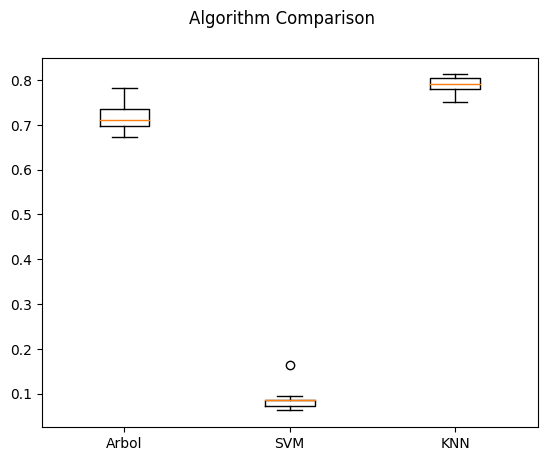

In [39]:
from sklearn.svm import SVC
from StatisticalAnalysis import compare_methods
from sklearn.tree import DecisionTreeClassifier

# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}


listAlgorithms = [clfTree,clfSVC,clfKNN]
listParams = [param_distTree,param_distSVC,param_distKNN]
listNames = ["Arbol", "SVM", "KNN", ]
compare_methods(datos_np,etiquetas_np,listAlgorithms,listParams,listNames,metric='accuracy')

##### Ejercicio

En la práctica 5 se proporcionó un fichero que explicaba cómo utilizar la librería `keras` para construir un modelo capaz de predecir los dígitos manuscritos. Utiliza dicha funcionalidad para construir un modelo de predicción.

In [ ]:
from keras.datasets import mnist
(imagenes_entrenamiento,etiquetas_entrenamiento),(imagenes_test,etiquetas_test) = mnist.load_data()
print(len(imagenes_entrenamiento))
print(len(imagenes_test))

60000
10000


In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
imagenes_entrenamiento = imagenes_entrenamiento.reshape((60000,28*28))
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')/255

In [ ]:
imagenes_test = imagenes_test.reshape((10000,28*28))
imagenes_test = imagenes_test.astype('float32')/255

In [ ]:
from tensorflow.keras.utils import to_categorical
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_test = to_categorical(etiquetas_test)

In [ ]:
network.fit(imagenes_entrenamiento,etiquetas_entrenamiento,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2614 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1054 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0693 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0498 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0380 - accuracy: 0.9885


##### Ejercicio

El último ejercicio adicional que se propone consiste en combinar la funcionalidad de contornos vista en la práctica 7 y el clasificador de identificación de dígitos.

Comenzamos cargando las librerías y funcionalidades necesarias.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline

In [ ]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

Cargamos la imagen en la cual queremos leer los dígitos escritos y la mostramos.

In [ ]:
!wget www.unirioja.es/cu/joheras/ia/p10/imagen1.png

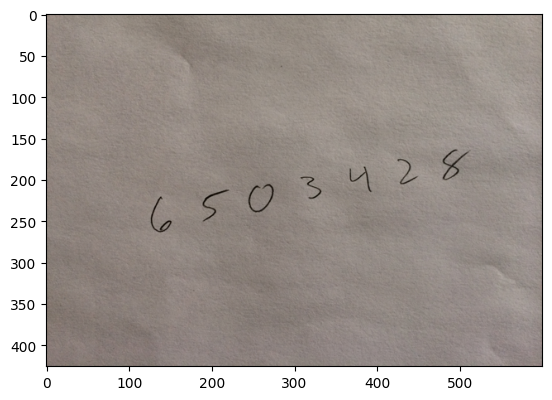

In [ ]:
image = cv2.imread("imagen1.png")
mostrarImagen(image)

In [ ]:
clone = image.copy()

Convierte la imagen a escala de grises.

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Aplica una umbralización con valor de umbral 80.

In [ ]:
thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)[1]

Busca los cortornos de la imagen, y para cada uno de ellos encuentra el bounding box que lo contiene.

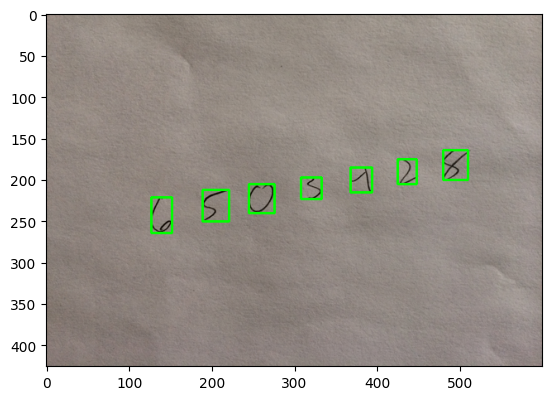

In [ ]:
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)

mostrarImagen(clone)

Utilizando el bounding box que contiene al contorno, predice el número contenido utilizando el modelo que hayas definido y muestra el resultado en la imagen. Debes tener en cuenta varias cosas, las imágenes del dataset tienen tamaño 28x28, por lo que es posible que tengas que reescalar tu imagen, además en las imágenes el digito aparece en blanco con fondo negro, mientras que en la imagen está justo al revés, por lo que tendrás que invertir los colores.

1/1 [==============================] - 0s 25ms/step


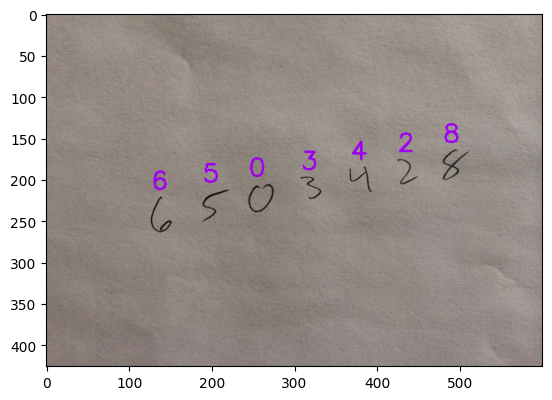

In [ ]:
clone = image.copy()
for (i, c) in enumerate(cnts):

    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)

    aspectRatio = w / float(h)
    extent = area / float(w * h)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)


    numero = thresh[y-15:y+h+10,x-10:x+w+10]


    numero = cv2.resize(numero,(28,28))


    numero = numero.astype('float32')/255

    numero = numero.flatten()




    predict = network.predict(np.array([numero]) )

    numeroPredicho = np.argmax(predict)

    cv2.putText(clone, str(numeroPredicho), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1,(240, 0, 159), 2)

mostrarImagen(clone)

Guarda este fichero con tus soluciones a los distintos ejercicios usando la opción **"Save in Github..."**.